# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [4]:
# a)

# Carregando a base de dados
tips = sns.load_dataset("tips")

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [5]:
# Reproduzindo a Regressão de tip Explicada por net_bill
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        19:53:54   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

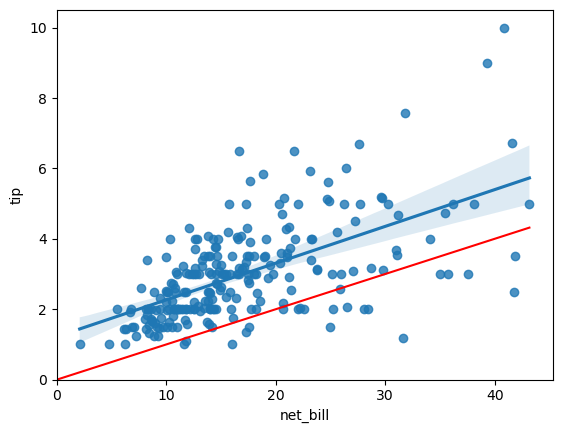

In [10]:
# b)

# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<Axes: xlabel='net_bill', ylabel='tip_pct'>

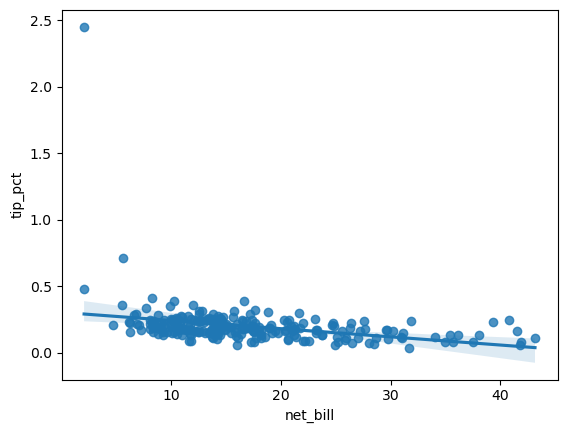

In [7]:
# Gerando o gráfico de dispersão ed tip_pct por net_bill
reg_2 = sns.regplot(y = 'tip_pct', x= 'net_bill', data= tips[tips['tip_pct']<40])
reg_2

In [15]:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        20:16:12   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:

reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        20:16:20   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

__COMPARAÇÃO DOS GRÁFICOS__

- Os dois gráficos mostram a relação entre a variável dependente (gorjeta ou % da gorjeta) e a variável independente (valor líquido da conta) em diferentes perspectivas, o primeiro gráfico é útil para visualizar a dispersão dos dados e a   da gorjeta em relação ao valor líquido da conta, já o segundo é mais informativo, pois mostra a tendência geral da porcentagem da gorjeta em relação ao valor líquido da conta através da linha de regressão.

__COMPARAÇÃO DIRETA DOS R²s__

- Não é apropriado a comparação direta dos R²s dos gráficos, pois os modelos diferem entre si, enquanto um a variável dependente é o valor absoluto da gorjeta, o outro é a porcentagem da gorjeta. Cada R² pode ser útil para avaliar a qualidade da análise das variáveis dentro de cada contexto.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [27]:
# 1. Obtendo valor predito para tip_pct
tip_pct_pred = reg2.fittedvalues


In [20]:
# 2. Obtendo valor predito para tip
tip_pred = tip_pct_pred * tips['net_bill']

In [22]:
# 3. Calculando R² para o Modelo em Relação à Variável tip
r_squared_tip = reg1.rsquared

In [29]:
# 4. Comparando novo R² com o do item 1.
reg2 = smf.ols(formula='tip_pct ~net_bill', data=tips).fit()
r_squared_tip_pct = reg2.rsquared

print(f"R² do modelo do item 1 (tip ~ net_bill): 0.333")
print(f"R² do modelo do item 4 (tip_pct ~ net_bill): {r_squared_tip_pct:.4f}")

R² do modelo do item 1 (tip ~ net_bill): 0.333
R² do modelo do item 4 (tip_pct ~ net_bill): 0.0913


- Conforme analisado anteriormente, o item 1 possui um ajuste melhor aos dados do que o outro modelo, sugerindo que a variável [net_bill] tem uma relação mais forte com [tip] do que com [tip_pct].